In [ ]:
#ASTR231
#extra credit - using gaia to investigate the LMC
#garcia, gil
#created: 05/09/2019

In [1]:
# we import the required libraries
import numpy as np
import matplotlib.pyplot as plt
# we use angle to define our radius for our cone searches
from astropy.coordinates import Angle
# we will query gaia dr2
from astroquery.gaia import Gaia
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [79]:
#setting plot size
from pylab import rcParams
rcParams['figure.figsize'] = 13,13

In [3]:
#querying Gaia using SQL
job = Gaia.launch_job_async("SELECT  designation,l,b,ra, dec, radial_velocity,teff_val,pmra,pmdec,parallax, parallax_error, bp_rp, bp_g,phot_g_mean_mag FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',80.8917,-69.7561,8))=1 AND parallax > 0.01 AND parallax < 0.03 ")

Query finished.


In [4]:
gaia_results = job.get_results()

In [5]:
#turning the results into a pandas df
df = gaia_results.to_pandas()

In [6]:
shape_row = df.shape[0]

In [7]:
shape_row

403018

In [8]:
#computing distance from the parallax values
distance = 1 / (df['parallax']/1000.)

In [9]:
df['distance'] = distance

In [10]:
#dist_constraint = df['distance'] >7500
#dist_contraint2 = df['distance'] <8500
#df1 = pd.DataFrame(df[dist_constraint])
#df2 = pd.DataFrame(df1[dist_contraint2])

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
constraint = df['distance'] >0
df1 = pd.DataFrame(df[constraint])

In [13]:
#constaining to the distance of the LMC
constraint1 = df1['distance'] < 49970+1000
df2 = pd.DataFrame(df1[constraint1])
constraint2 = df2['distance'] < 49970-1000
df3 = pd.DataFrame(df2[constraint1])

C:\Users\Gilberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [14]:
df3.shape

(207310, 15)

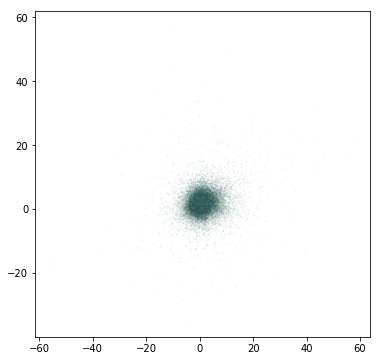

In [17]:
plt.scatter(df3['pmdec'],df3['pmra'],s=0.1,alpha=0.1,c=df3['distance'])
plt.show()

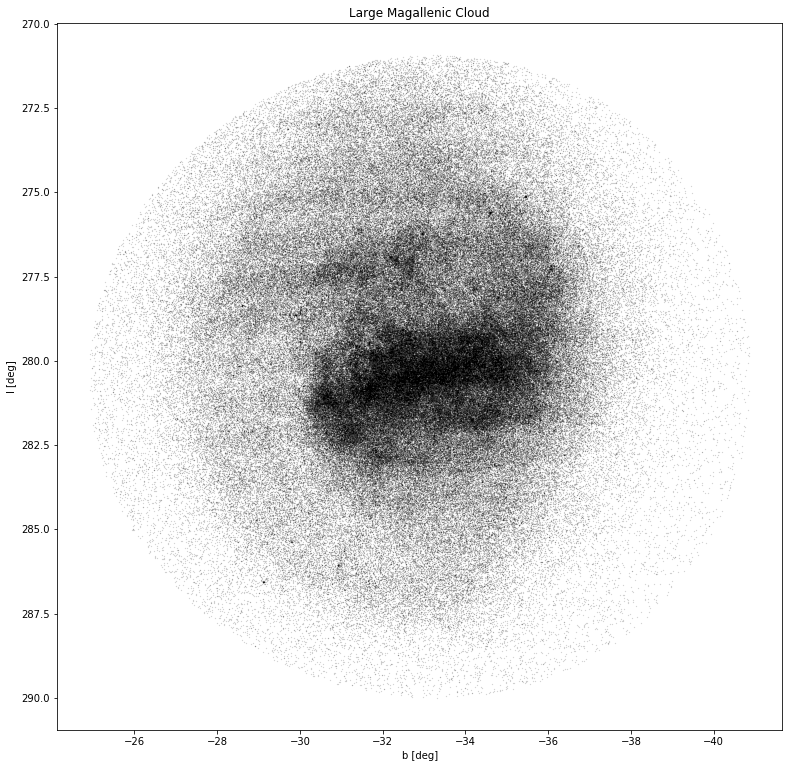

In [83]:
#plotting the LMC
plt.scatter(df['b'],df['l'],alpha=0.3,s=0.05,color='k')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Large Magallenic Cloud')
plt.xlabel('b [deg]')
plt.ylabel('l [deg]')
plt.savefig('lmc_structure.png')
plt.show()


In [29]:
#reducing data to that which containcs temp values
temp_constraint = df['teff_val'].notnull()
df_temp = pd.DataFrame(df[temp_constraint])

In [89]:
df_temp.shape

(47752, 15)

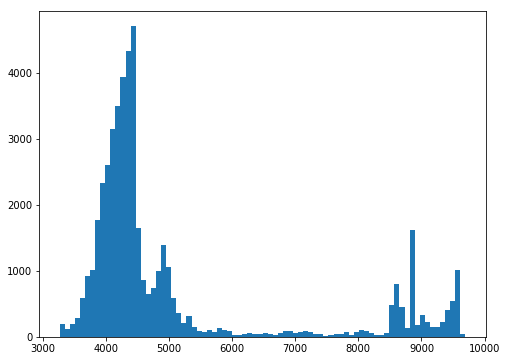

In [93]:
#quick look at distribution of temp values
plt.hist(df_temp['teff_val'],bins=80)
plt.show()

In [34]:
high_temp = df_temp['teff_val'] > 0
df_high_temp = pd.DataFrame(df_temp[high_temp])

In [85]:
rcParams['figure.figsize'] = 8,6

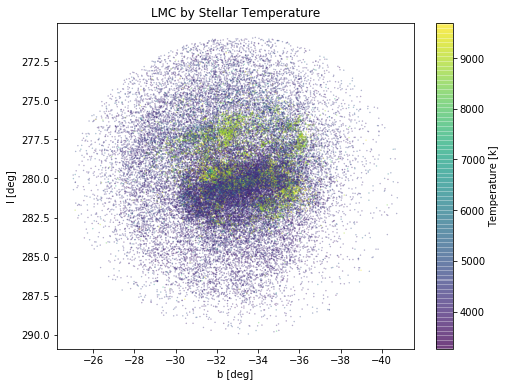

In [100]:
#adding a gradient which represents temperature to our LMC plot
x1 = df_temp['b']
y1 = df_temp['l']
plt.scatter(x1,y1,s = 0.15,alpha = 0.5,c=df_temp['teff_val'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Temperature [k]')
plt.title('LMC by Stellar Temperature')
plt.xlabel('b [deg]')
plt.ylabel('l [deg]')
plt.savefig('lmc_temp.png')
plt.show()

In [96]:
#finding the hottest stars in the LMC
high_temp = df_temp['teff_val'] > 8000
df_high_temp = pd.DataFrame(df_temp[high_temp])

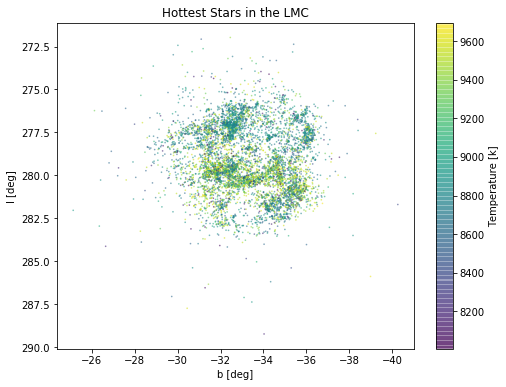

In [98]:
x1 = df_high_temp['b']
y1 = df_high_temp['l']
plt.scatter(x1,y1,s = 0.5,alpha = 0.5,c=df_high_temp['teff_val'])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Temperature [k]')
plt.title('Hottest Stars in the LMC')
plt.xlabel('b [deg]')
plt.ylabel('l [deg]')
plt.show()

In [39]:
#now constaining original df to data which contains rv data
rv_constraint = df['radial_velocity'].notnull()
df_rv = pd.DataFrame(df[rv_constraint])

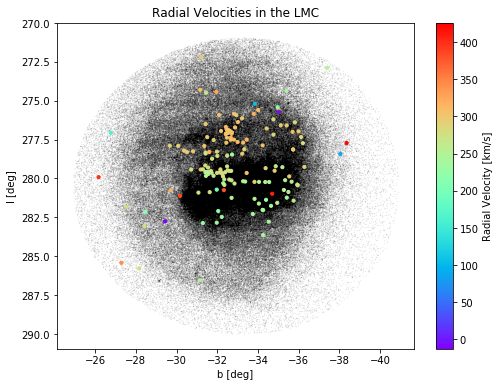

In [101]:
#overlaying rv data to our LMC plt
x1 = df_rv['b']
y1 = df_rv['l']
plt.scatter(df['b'],df['l'],color='k',s=0.1,alpha=0.1)
plt.scatter(x1,y1,c=df_rv['radial_velocity'],cmap='rainbow',s=10)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Radial Velocity [km/s]')
plt.title('Radial Velocities in the LMC')
plt.xlabel( 'b [deg]')
plt.ylabel('l [deg]')
plt.savefig('lmc_rv.png')
plt.show()

In [45]:
df_rv['radial_velocity'].mean()

275.87220483590943

In [46]:
#finally, creating a color mag plt of the LMC
color_constraint = df['bp_rp'].notnull()
df_color = pd.DataFrame(df[color_constraint])

In [47]:
def distane_modulus(apparant_m,distance):
    term2 = 5*(np.log10(distance)-1)
    return (apparant_m - term2)

In [48]:
abs_g_mags = distane_modulus(df_color['phot_g_mean_mag'],df_color['distance'])

In [77]:
rcParams['figure.figsize'] = 8,9

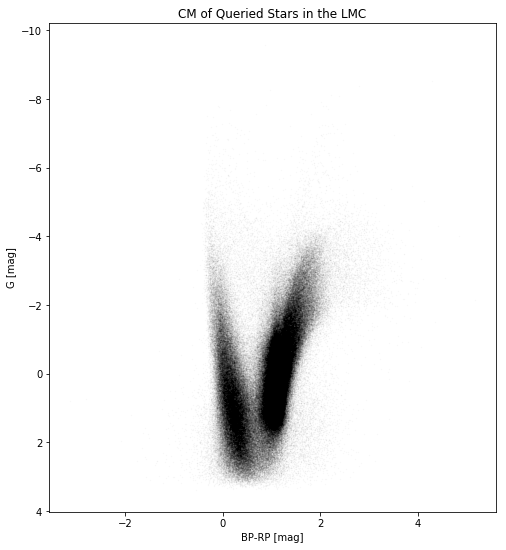

In [78]:
plt.scatter(df_color['bp_rp'],abs_g_mags,alpha=0.05,s=0.05,color='k')
plt.gca().invert_yaxis()
plt.title('CM of Queried Stars in the LMC')
plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')
plt.show()